# Data Cleaning Customer Demographics

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [10]:
cust_demo = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerDemographic')

In [11]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [12]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

# Checking Total Records 

In [13]:
print('Total number of rows in the data set : {}'.format(cust_demo.shape[0]))
print('Total number of columns in the data set : {}'.format(cust_demo.shape[1]))

Total number of rows in the data set : 4000
Total number of columns in the data set : 13


# Numeric and Non-Numeric Columns

In [19]:
df_numeric = cust_demo.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
numeric_cols



array(['customer_id', 'past_3_years_bike_related_purchases', 'tenure'],
      dtype=object)

In [20]:
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
non_numeric_cols

array(['first_name', 'last_name', 'gender', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car'], dtype=object)

# Checking for Missing Values 

In [21]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

- Here we see an irrelevant column called Default 

# Dropping irrelevant column

In [22]:
cust_demo.drop(labels={'default'}, axis=1 , inplace=True)

In [23]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


# Removing or Filling Missing Values

## Last Names

In [24]:
# Checking for the presence of first name and customer id in records where last name is missing, so that we can delete/ or fill with some value for that particluar column

cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

- This shows that wherever we have last name missing we have first name and customer id hence we can fill last name column which have missing values with none 

In [25]:
cust_demo['last_name'].fillna('None',axis=0, inplace=True)

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_21136\901148455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_demo['last_name'].fillna('None',axis=0, inplace=True)


In [26]:
cust_demo['last_name'].isnull().sum()

0

# Date of Birth

In [27]:
cust_demo[cust_demo['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


In [28]:
round(cust_demo['DOB'].isnull().mean()*100)

2

- Since less than 5 % of data has null date of birth. we can remove the records or entire index where date of birth is null.

In [31]:
cust_demo.drop(index=cust_demo[cust_demo['DOB'].isnull()].index, inplace=True, axis=0)

In [32]:
cust_demo['DOB'].isnull().sum()

0

# Tenure

In [33]:
cust_demo['tenure'].isnull().sum()

0

# Job Title

In [34]:
cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,None,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,Yes,11.0
10,11,Uriah,Bisatt,Male,99,1954-04-30 00:00:00,NaN,Property,Mass Customer,N,No,9.0
21,22,Deeanne,Durtnell,Female,79,1962-12-10 00:00:00,NaN,IT,Mass Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22 00:00:00,NaN,Property,High Net Worth,N,No,22.0
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28 00:00:00,NaN,Retail,Mass Customer,N,No,8.0
3978,3979,Kleon,Adam,Male,67,1974-07-13 00:00:00,NaN,Financial Services,Mass Customer,N,Yes,18.0
3986,3987,Beckie,Wakeham,Female,18,1964-05-29 00:00:00,NaN,Argiculture,Mass Customer,N,No,7.0


- Replacing NaN values with missing 

In [35]:
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_21136\389922831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)


In [37]:
cust_demo['job_title'].isnull().sum()

0

# Job Industry Category

In [38]:
cust_demo[cust_demo['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,No,7.0
15,16,Harlin,Parr,Male,38,1977-02-27 00:00:00,Media Manager IV,NaN,Mass Customer,N,Yes,18.0
16,17,Heath,Faraday,Male,57,1962-03-19 00:00:00,Sales Associate,NaN,Affluent Customer,N,Yes,15.0
17,18,Marjie,Neasham,Female,79,1967-07-06 00:00:00,Professor,NaN,Affluent Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15 00:00:00,Geologist I,NaN,Mass Customer,N,Yes,11.0
3973,3974,Misha,Ranklin,Female,82,1961-02-11 00:00:00,Technical Writer,NaN,Affluent Customer,N,Yes,9.0
3975,3976,Gretel,Chrystal,Female,0,1957-11-20 00:00:00,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0
3982,3983,Jarred,Lyste,Male,19,1965-04-21 00:00:00,Graphic Designer,NaN,Mass Customer,N,Yes,9.0


- Replacing NaN values with missing

In [39]:
cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)


C:\Users\srivastavash\AppData\Local\Temp\ipykernel_21136\3949778673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)


In [40]:
cust_demo['job_industry_category'].isnull().sum()

0

# Checking Age discrepancies if any existed

In [43]:
# Function to calculate age as per todays date
def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])
cust_demo['Age'] = cust_demo['DOB'].apply(age)

- We will have a distribution plot to check the distibution of age 

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_21136\3274543902.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_demo['Age'], kde=False, bins=50)


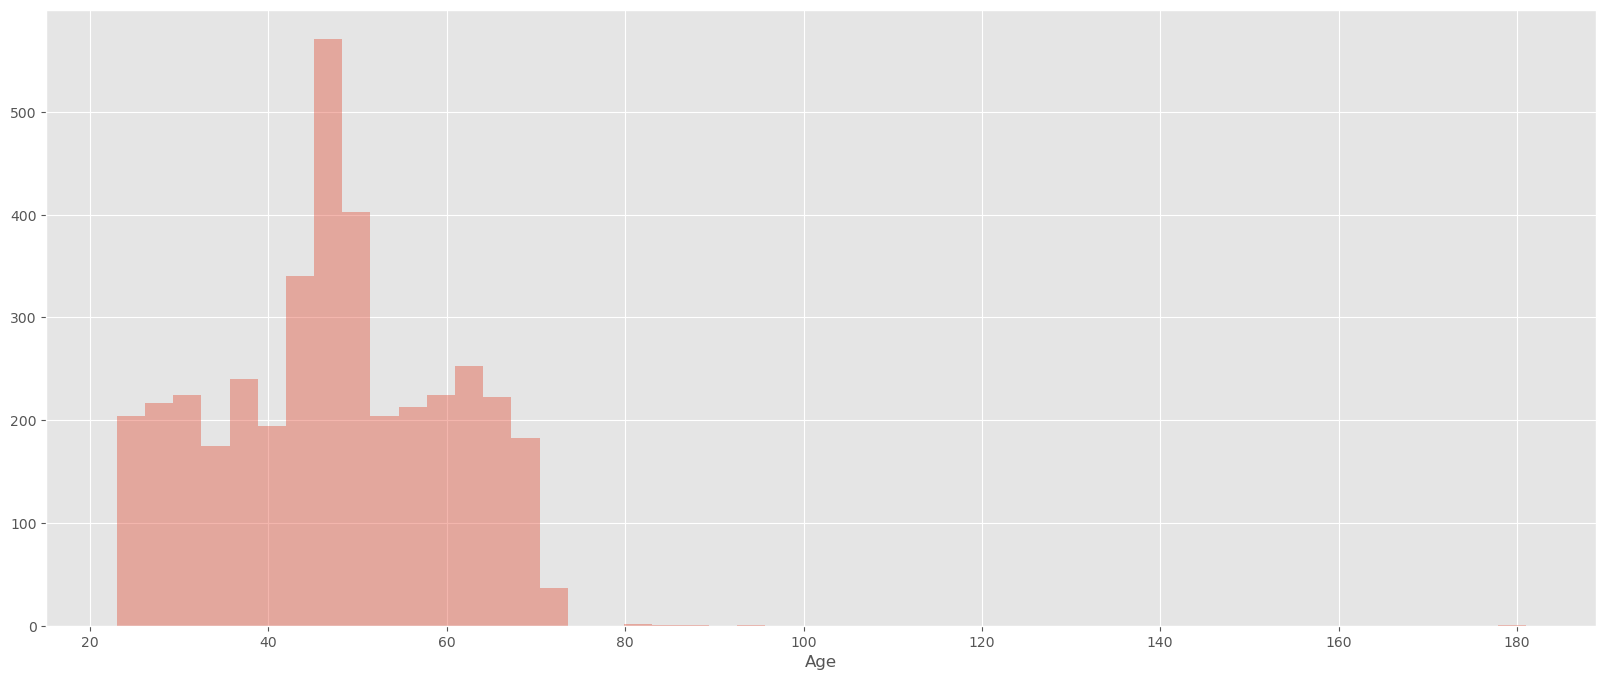

In [44]:
plt.figure(figsize=(20,8))
sns.distplot(cust_demo['Age'], kde=False, bins=50)
plt.show()

In [45]:
# Statistics of age column 
cust_demo['Age'].describe()

count    3913.000000
mean       47.275492
std        12.801906
min        23.000000
25%        38.000000
50%        47.000000
75%        57.000000
max       181.000000
Name: Age, dtype: float64

- Here we find there is only 1 customer with an age of 181. Clearly this is an outlier since the 75% of Age is 53.

In [46]:
# Deleteing the outlier
cust_demo.drop(index=cust_demo[cust_demo['Age']>100].index, inplace=True , axis=0)

In [47]:
cust_demo['Age'].describe()

count    3912.000000
mean       47.241309
std        12.623678
min        23.000000
25%        38.000000
50%        47.000000
75%        57.000000
max        93.000000
Name: Age, dtype: float64

# Checking inconsistencies in the data set 
## Gender

In [48]:
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

- we have M,F and Femal as inconsistant, hence fixing it 

In [49]:
def gender_check(x):
    if x=='M':
        return 'Male'
    elif x=='F':
        return 'Female'
    elif x=='Femal':
        return 'Female'
    else:
        return x

cust_demo['gender'] = cust_demo['gender'].apply(gender_check)

In [50]:
cust_demo['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

# Wealth Segment 

In [51]:
cust_demo['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

- no inconsistancy

# Deceased Indicator

In [53]:
cust_demo['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

- no inconsistancy

# Owns a car

In [54]:
cust_demo['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

- no inconsistancy

# Duplication Checks

In [57]:
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()

print('Number of records after removing customer_id or primary key, duplicates : {}'.format(cust_demo_dedupped.shape[0]))
print('Number of records in original dataset : {}'.format(cust_demo.shape[0]))

Number of records after removing customer_id or primary key, duplicates : 3912
Number of records in original dataset : 3912


- Since the number of indexes or rows are same in both cases, henece we have no duplictated values.
- Note: .format is a property of Pandas that return number of rows and columns as a tuple

# Exporting Cleaned Data set to CSV

In [56]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)

#Index=false will make sure we don't have an added column with number of rows in the csv file 